In [1]:
# loads in era5 nc file and does exploratory analysis
import metpy as mp
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from utils_environment import *

In [2]:
# for apr 27 2011 test files: compares ERA and metpy's cape values
datestring = '201104270000'
subfolder = 'test'
single_path = 'data/era5/' + subfolder + '/single/' + datestring + '_single.nc'
pressure_path = 'data/era5/' + subfolder + '/pressure/' + datestring + '_pressure.nc'

In [3]:
# load datasets
ds_single = xr.load_dataset(single_path)
ds_pressure = xr.load_dataset(pressure_path)

In [4]:
ds_single = calculate_cape(ds_single, ds_pressure)

C:\Users\miles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\metpy\calc\thermo.py:1384: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
C:\Users\miles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\metpy\calc\thermo.py:1341: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


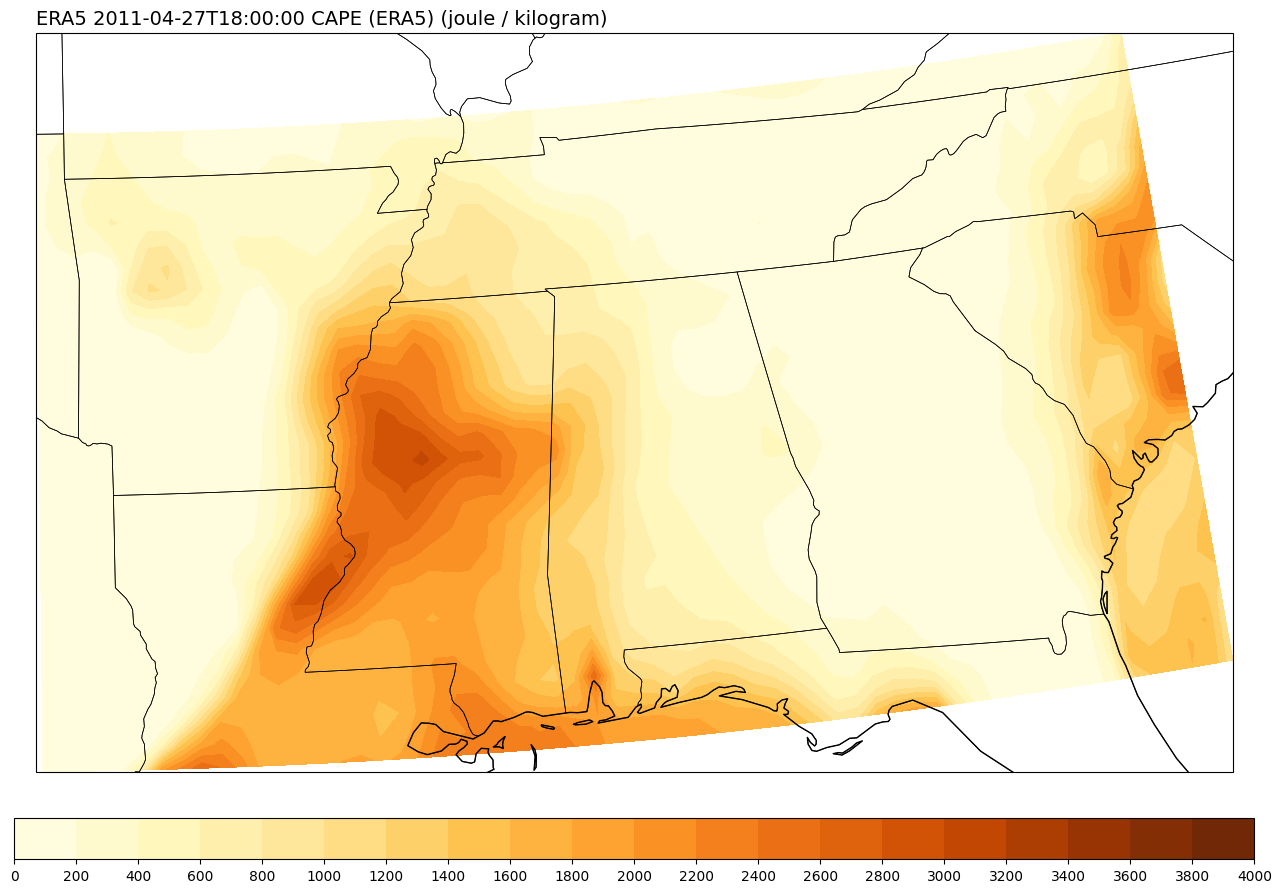

<Figure size 640x480 with 0 Axes>

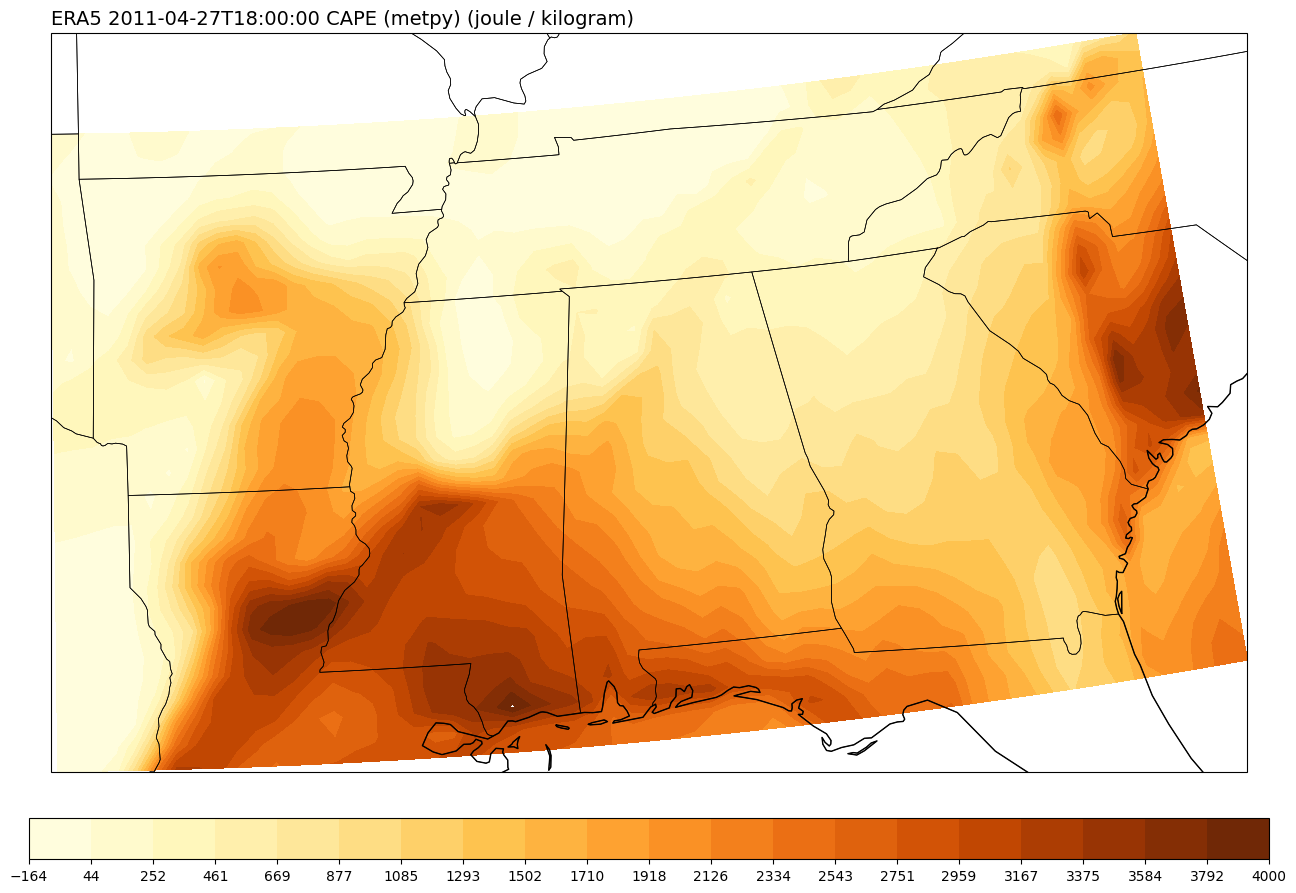

<Figure size 640x480 with 0 Axes>

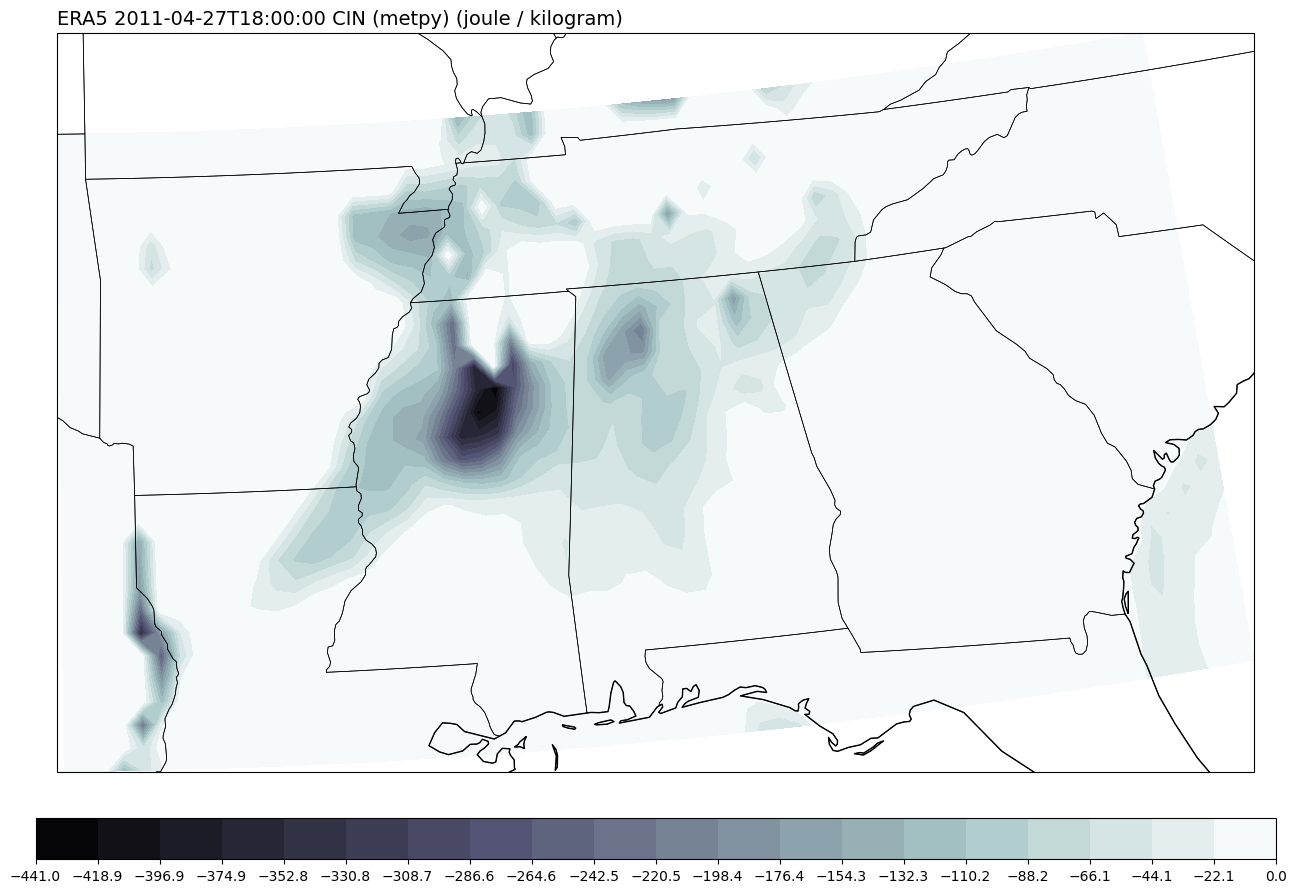

<Figure size 640x480 with 0 Axes>

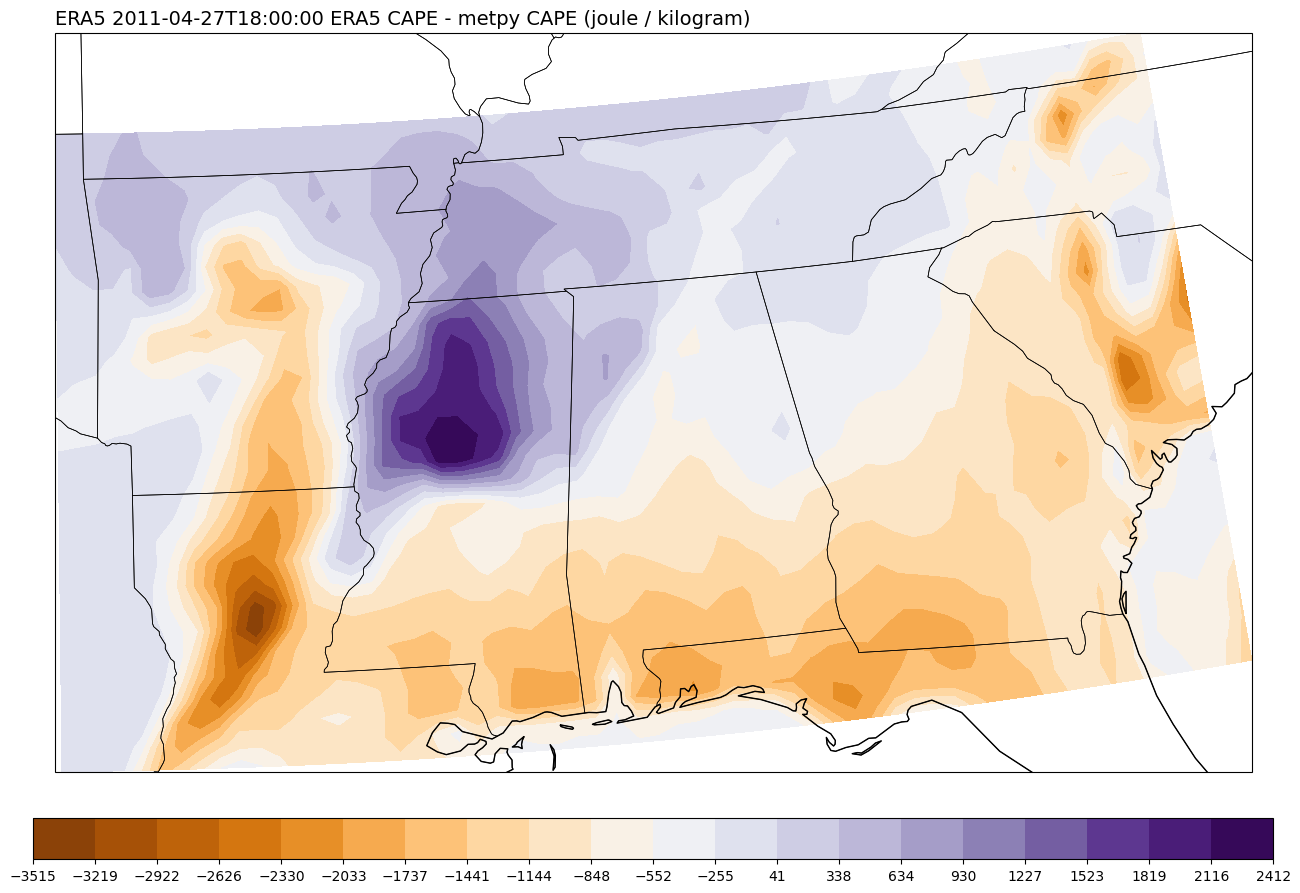

<Figure size 640x480 with 0 Axes>

In [13]:
time = ds_single['time'][3]


plot_era5_variable(ds_single, time, 'cape', 'CAPE (ERA5)', max = 4000)
plot_era5_variable(ds_single, time, 'cape_mp', 'CAPE (metpy)', max = 4000)
plot_era5_variable(ds_single, time, 'cin_mp', 'CIN (metpy)', cmap= 'bone')
plot_era5_variable(ds_single, time, 'cape_dif', 'ERA5 CAPE - metpy CAPE', cmap='PuOr')
# todo: plot cape, cape_mp, cin, difference



In [6]:
ds_single

<xarray.Dataset>
Dimensions:    (longitude: 61, latitude: 29, time: 4)
Coordinates:
  * longitude  (longitude) float32 -95.0 -94.75 -94.5 ... -80.5 -80.25 -80.0
  * latitude   (latitude) float32 37.0 36.75 36.5 36.25 ... 30.5 30.25 30.0
  * time       (time) datetime64[ns] 2011-04-27 ... 2011-04-27T18:00:00
Data variables:
    u100       (time, latitude, longitude) float32 -1.447 -1.561 ... -1.292
    v100       (time, latitude, longitude) float32 -2.153 -2.142 ... 10.15 10.79
    u10        (time, latitude, longitude) float32 -1.02 -1.098 ... -1.483 -1.09
    v10        (time, latitude, longitude) float32 -1.494 -1.314 ... 8.455 9.253
    d2m        (time, latitude, longitude) float32 282.7 284.8 ... 296.1 295.8
    t2m        (time, latitude, longitude) float32 287.9 287.8 ... 298.7 299.3
    cape       (time, latitude, longitude) float32 0.0 0.0 ... 1.02e+03
    sp         (time, latitude, longitude) float32 9.689e+04 ... 1.015e+05
    cape_mp    (time, latitude, longitude) float32 0.0 0.0 ... 2.421e+03
    cin_mp     (time, latitude, longitude) float32 0.0 0.0 0.0 ... -3.331 0.0
    cape_dif   (time, latitude, longitude) float32 0.0 0.0 ... -935.5 -1.401e+03
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-28 01:20:16 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...